![](logofgv.png)

____
# Fila de Banco
_____

Este programa simula a chegada de clientes a um banco, que possui alguns postos de atendimento (caixas). 

A fila é única para todos os caixas.

Os tempos entre chegadas de clientes segue uma distribuição exponencial.

A duração do atendimento a um cliente no caixa segue uma distribuição normal. 

Ao final, você encontrará algumas sugestões de melhorias neste programa, que foram feitas e entregue como avaliação no curso.


## Definições
_____

### eventos 
É uma lista de eventos programados, sendo que cada evento
pode ser:


*   -1 é o evento da chegada de um cliente ao banco
*   0, 1, 2 ... é o evento do término do atendimento de um cliente
no caixa 0, 1, 2, ...

### horário_eventos
É a lista dos horários em que ocorrerão os eventos programados na lista **eventos**. 

### caixas
É uma lista dos caixas (postos de atendimentos). Cada caixa pode estar em um dos seguintes estados:
*   "livre"
*   "ocupado"
*   "fechado"

### fila
É uma lista que contém os horários de chegada nos clientes que comporão a fila de atendimento. 

Serve para podermos medir o tempo de espera em fila. 


### horário
Variável inteira com o horário atual. O tempo é medido em segundos, contados a partir do instante 0 (instante em que a simulação começou a ser executada).

### tempos_espera
Lista que registra o tempo de espera na fila de cada cliente que vem ao banco. Se o cliente não encontrou nenhuma fila, registra zero. Unidade é minutos (e não segundos!). 


_____
## Sugestões de Melhoria

Evolua o programa dado em aula.

**a)** Permita que o usuário escolha a distribuições de probabilidade para os tempos entre chegadas de clientes. No programa acima, usamos a Distribuição Normal (parâmetros são o tempo médio e o desvio-padrão). 

Mas, uma melhor distribuição de probabilidades para esses tempos é a Distribuição Exponencial, cujo único parâmetro é a média (o desvio-padrão é sempre igual à média nesta distribuição). Permita também que o usuário escolha os parâmetros da distribuição.

**b)** Permita que o usuário escolha os parâmetros da distribuição normal de probabilidades para a duração do atendimento no caixa. 

**c)** Faça com que o programa informe o tamanho máximo da fila de clientes no banco.

**d)** Permita que o usuário defina o número de caixas disponíveis. 

**e)** Introduza o conceito de cliente senior. Usuário deve informar a probabilidade de um cliente ser senior. Faça com que o caixa $0$ dê prioridade aos clientes sênior.

**Dicas:**

*   normal: random.gauss(média, dp)
*   uniforme discreta: random.randint(mínimo, máximo)
*   uniforme contínua: random.uniform(mínimo, máximo)
*   exponencial: random.expovariate(1/média)

____

Deseja configurar o sistema? [y/N] y


Escolha o tipo de distribuição de probabilidade para os tempos entre chegadas:
(1) Normal 
(2) Exponencial


 50


Escolha os parâmetros para o tipo de distribuição normal:


Qual é o valor da média? 50
Qual é o valor do desvio padrão? 60


Escolha os parâmetros para o tipo de distribuição do tempo de permanência no caixa:


Qual é o valor da média? 20
Qual é o valor do desvio padrão? 30
Defina o número de caixas disponíveis: (padrão 3) 5
Defina a probabilidade do cliente ser sênior: 70


Tratando evento = chegada de cliente, horário do evento = 0 segundos
Programado evento de chegada de novo cliente aos -48.0 segundos
Programado evento de final de atendimento no caixa  0  aos 157.2 segundos
Tamanho da fila =  0
Caixas:  ['ocupado', 'livre', 'livre', 'livre', 'livre']
Tratando evento = chegada de cliente, horário do evento = -48.0 segundos
Programado evento de chegada de novo cliente aos -0.2 segundos
Programado evento de final de atendimento no caixa  1  aos 167.1 segundos
Tamanho da fila =  0
Caixas:  ['ocupado', 'ocupado', 'livre', 'livre', 'livre']
Tratando evento = chegada de cliente, horário do evento = -0.2 segundos
Programado evento de chegada de novo cliente aos -7.9 segundos
Programado evento de final de atendimento no caixa  2  aos 184.9 segundos
Tamanho da fila =  0
Caixas:  ['ocupado', 'ocupado', 'ocupado', 'livre', 'livre']
Tratando evento = chegada de cliente, horário do evento = -7.9 segundos
Programado evento de chegada de novo cliente aos 54.0 segundos

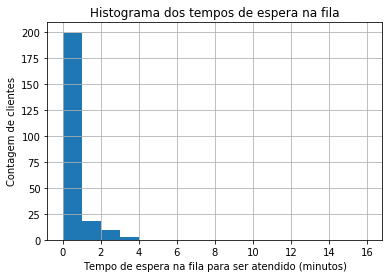

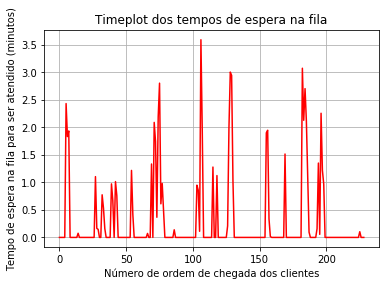

In [18]:
import random  # biblioteca para geração de números aleatórios
import time  # biblioteca que possui função para gerar espera no processamento

# "magic funcion" para gráficos aparecerem aqui no Jupyter
%matplotlib inline 


from matplotlib import pyplot as plt  # biblioteca gráfica

random.seed(1) # define semente fixa para geração de números pseudo-aleatórios

#-------------------------------------------------------------------------------------------------------------------------------------

# Horário corrente (inteiro, em segundos) começa em zero.
horario = 0 

# A lista de eventos começa, de início, com um único evento: a chegada de um
# cliente. Este evento ocorrerá no instante 0.
eventos = [-1]
horario_eventos = [0]

# A fila de atendimento começa vazia (ninguém na fila). 
fila = []
fila_senior = []
tamanho_maximo_fila = 0 # armazena para fins estatístico o tamanho máximo da fila.

# Não há registros de tempos de espera pelos clientes (ninguém chegou ainda!).
tempos_espera = []

#-------------------------------------------------------------------------------------------------------------------------------------
# A função configuracao() permite o usuário configurar alguns parâmetros da aplicação.
# Os parâmetros são os itens pedidos no exercício.

tipo_probalidade = 'normal'
media_chegada = 59  # valor padrão conforme exercício
desviopadrao_chegada = 8  # valor padrão conforme exercício

media_caixa = 180  # valor padrão conforme exercício
desviopadrao_caixa = 30  # valor padrão conforme exercício

qnt_caixas = 3  # valor padrão conforme exercício

probabilidade_senior = 0

def configuracao():
    global tipo_probalidade, media_chegada, desviopadrao_chegada, media_caixa, desviopadrao_caixa, qnt_caixas, probabilidade_senior
    
    # Qualquer coisa diferente de y encerra a função.
    if input('Deseja configurar o sistema? [y/N]').lower() != 'y':
        return
    
    print('Escolha o tipo de distribuição de probabilidade para os tempos entre chegadas:')
    print('(1) Normal \n(2) Exponencial')
    escolha = input()
    tipo_probalidade = 'exponencial' if escolha == '2' else tipo_probalidade
    
    print('Escolha os parâmetros para o tipo de distribuição %s:' % tipo_probalidade)
    media_chegada = int(input('Qual é o valor da média?'))
    if tipo_probalidade == 'normal': 
        desviopadrao_chegada = int(input('Qual é o valor do desvio padrão?'))
        
    print('Escolha os parâmetros para o tipo de distribuição do tempo de permanência no caixa:')
    media_caixa = int(input('Qual é o valor da média?'))
    desviopadrao_caixa = int(input('Qual é o valor do desvio padrão?'))
    
    qnt_caixas = int(input('Defina o número de caixas disponíveis: (padrão 3)'))
    
    probabilidade_senior = float(input('Defina a probabilidade do cliente ser sênior:'))
        
        
#-------------------------------------------------------------------------------------------------------------------------------------

# Chegada de um novo cliente ao banco
# A função chegada() não recebe nenhum parâmtro e não devolve nenhum resultado.

def chegada():  
    
    # As variáveis abaixo estão no programa principal.
    global horario, eventos, horario_eventos, caixas, fila, tamanho_maximo_fila, fila_senior
    
    # Programa a chegada de um próximo cliente após um tempo aleatório. 

    senior = random.randint(1,101) <= probabilidade_senior
    eventos.append(-1)
    
    if tipo_probalidade == 'normal':
        randomico = random.gauss(media_chegada, desviopadrao_chegada) # normal, especificando média e dp
    elif tipo_probalidade == 'exponencial':
        randomico = random.expovariate(1/media_chegada)
        
    h = horario + randomico 
    horario_eventos.append(h)
    print("Programado evento de chegada de novo cliente aos", round(h,1), "segundos")
    
    # Se há caixa livre, programa o evento o término do atendimento de cliente
    # recém chegado neste caixa.
    # Se não há caixa livre, cliente vai para fila de espera. 
    if "livre" in caixas:          # verifica aqui se há caixa livre   
      i = caixas.index("livre")    # em havendo caixa livre, descobre qual caixa
      caixas[i] = "ocupado"        # o caixa passa a estar ocupado agora
      eventos.append(i)            # gera evento do término do atendimento
      h = horario + random.gauss(180, 30) # normal, especificando média e dp
      horario_eventos.append(h)    # registra o horário programado para o final
                                   # desse atendimento
      tempos_espera.append(0)      # registra a espera deste cliente (0 seg) 
      print("Programado evento de final de atendimento no caixa ", i, " aos", round(h,1), "segundos")
    else:
      if senior:
        fila_senior.append(horario)
      else:
        fila.append(horario)       # estando todos os caixas ocupados, 
                                   # põe cliente na fila (anota-se na fila o
                                   # o instante de chegada deste cliente)
      tamanho_maximo_fila = max(tamanho_maximo_fila, len(fila))        
        
#-------------------------------------------------------------------------------------------------------------------------------------   
        
# Trata o eventos do término do atendimento do cliente no caixa i. 
# Se há cliente na fila, aloca-o neste caixa, programando o término do
# atendimento neste caixa. 
# A função saida(i) recebe, como parâmetro o número do caixa terminou de
# atender seis cliente. Mas a função nada retorna como resultado. 

def saida(i):
  
    # As variáveis abaixo estão no programa principal.
    global horario, eventos, horario_eventos, caixas, fila
    
    if len(fila) == 0 and len(fila_senior) == 0:        # Caixa foi liberado, mas não há cliente
        caixas[i] = "livre"   # na fila --> muda status deste caixa para livre.
    
    else:
        # Havendo cliente na fila, registra quantos minutos ele esperou
        # para ser atendido e registra essa informação. Retira o cliente da
        # fila. Programa o final do atendimento do cliente nesse caixa.
        
        if i == 0 and len(fila_senior):
            tempos_espera.append((horario-fila_senior[0])/60) # espera = agora - chegada
            del fila_senior[0]
        elif i != 0 and not len(fila) and len(fila_senior):
            tempos_espera.append((horario-fila_senior[0])/60) # espera = agora - chegada
            del fila_senior[0]
        else:
            tempos_espera.append((horario-fila[0])/60) # espera = agora - chegada
            del fila[0]

        eventos.append(i)
        y = horario+random.gauss(media_caixa, desviopadrao_caixa)
        horario_eventos.append(y)
        print("Programado evento de final de atendimento no caixa ", i, " aos", round(y, 1), "segundos")
        
#-------------------------------------------------------------------------------------------------------------------------------------    

# Descobre qual o próximo evento a tratar na lista de eventos.
# A função proximo_evento() não recebe parâmetros e devolve, como resposta,
# qual é o próximo evento (-1 = chegada de cliente, 0, 1, 2... = término de
# atendimento em um caixa). 
# Para tanto procura em horario-eventos o horário mais próximo (o menor deles). 
# Se há cliente na fila, aloca-o neste caixa,
# programando o término do atendimento neste caixa. 
# A lista de eventos nunca estará vazia, por construção. 
# Essa função retorna o tipo do próximo evento (-1, 0, 1, 2..). 

def proximo_evento():
  
    global horario, eventos, horario_eventos, caixas, fila
    
    
    pos = horario_eventos.index(min(horario_eventos)) # index do próximo evento
    evento = eventos[pos]                             # obtém evento
    horario = horario_eventos[pos]                    # obtém horário do evento
    if evento == -1:
      e = "chegada de cliente"
    else:
      e = "término de atendimento no caixa " + str(evento)
    
    print("Tratando evento = " + e + ", horário do evento =", round(horario, 1), "segundos")
    eventos.pop(pos)            # apaga o referido evento da lista de eventos
    horario_eventos.pop(pos)    # apaga horário do evento na lista dos horários
    return evento               # devolve o evento para o programa principal
    
# -------------------------------------------------------------------------------------------------------------------------------------
    
# PROGRAMA PRINCIPAL

configuracao()

# Aqui está o estado inicial dos postos de atendimento (caixas).
caixas = ["livre"] * qnt_caixas


# Trata eventos programados durante as 3 primeiras horas.
while horario < 60*60*3:  # 3 horas
 
  # time.sleep(1) # para melhorar a apresentação (ser quiser fazê-la pausada)
  
  x = proximo_evento()   # descobre qual é e trata o próximo evento
  if x == -1:
    chegada()
  else:  # é Saída
     saida(x)
      
  print("Tamanho da fila = ", len(fila)) # imprime tamanho da fila
  print("Caixas: " , caixas)             # imprime situação dos caixas
  
print()
print()
print("**** Tempo máximo de espera na fila (minutos): ", round(max(tempos_espera), 1))
print("**** Tempo médio de espera na fila (minutos): ", round(sum(tempos_espera)/len(tempos_espera), 1))
print("**** Tamanho máximo da fila: ", tamanho_maximo_fila)
print()
print()

# gera histograma dos tempos de espera na fila
plt.hist(tempos_espera, bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
plt.title('Histograma dos tempos de espera na fila')
plt.xlabel("Tempo de espera na fila para ser atendido (minutos)")
plt.ylabel("Contagem de clientes")
plt.grid(True)
plt.show()

# gera line plot dos tempos de espera na fila
plt.plot(tempos_espera, color = "r")
plt.title('Timeplot dos tempos de espera na fila')
plt.xlabel("Número de ordem de chegada dos clientes")
plt.ylabel("Tempo de espera na fila para ser atendido (minutos)")
plt.grid(True)
plt.grid(True)
plt.show()

